# FBI Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project I will be analyzing the backgroun check applications data from National Instant Criminal Background Check System (NICS) which is used for conducting background checks of a prospective firearm buyers and for other puproses related to firearms handover.
I will be analyzing if the number of applications for background check is increasing or decreasing and what factors impact the number of applications the most.
In my opinion, the number of the applications is impacted by gun laws and laws related to self-defense ("Stand your ground" and "Duty to retreat doctrines") in a particular state and by income level.

### Questions that will be addressed in this analysis:


>**1. How the number of applications for the background check has changed over years?**

>**2. Which state has the highest number of applictions?**

>**3. Do gun laws in a particular state impact the number of applications?**

>**4. Does the level of income per capita in a particular state impacts the number of applications?**

### Links that were used in this analysis:


<n><li><a href="https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md">Additional information about NICS dataset</a></li></n>

<n><li><a href="https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view">Original FBI Dataset</a></li></n>

<n><li><a href="https://www.atf.gov/file/110076/download">Additional information about Federal Firearms License</a></li></n>


<n><li><a href="https://www2.census.gov/programs-surveys/popest/technical-documentation/methodology/2010-2019/natstcopr-methv2.pdf">Information about Methodology of population estimates</a></li></n>

<n><li><a href="https://en.wikipedia.org/wiki/Gun_laws_in_the_United_States_by_state">Information about gun laws in the United States</a></li></n>

<n><li><a href="https://en.wikipedia.org/wiki/Stand-your-ground_law">Information about Stand-Your-Ground doctine in the United States</a></li></n>

<n><li><a href="https://www.census.gov/quickfacts/fact/note/US/INC910218#:~:text=Per%20capita%20income%20is%20the,those%20living%20in%20group%20quarters.&text=For%20the%20complete%20definition%2C%20go,Months%2C%20Per%20Capita%20Income.%22">Information about Per Capita Income</a></li></n>

**Resources used for improving the code:**

https://stackoverflow.com/

https://pythonspot.com/

https://towardsdatascience.com/

<a id='wrangling'></a>
## Data Wrangling

>**Importing the necessary modules and magic commands.**

### Data Reading

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

>**I'll have a quick look ohe data and determine which columns and rows can be used in the analysis and which ones can be dropped.**

In [38]:
df = pd.read_excel('~/Desktop/Udacity/Project 2/Data/gun_data.xlsx')
df.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.00,0.00,5734.00,6320.00,221.00,317,0.00,15.00,...,0.00,0.00,0.00,9.00,16.00,3.00,0.00,0.00,3.00,32019
1,2017-09,Alaska,209.00,2.00,2320.00,2930.00,219.00,160,0.00,5.00,...,0.00,0.00,0.00,17.00,24.00,1.00,0.00,0.00,0.00,6303
2,2017-09,Arizona,5069.00,382.00,11063.00,7946.00,920.00,631,0.00,13.00,...,0.00,0.00,0.00,38.00,12.00,2.00,0.00,0.00,0.00,28394
3,2017-09,Arkansas,2935.00,632.00,4347.00,6063.00,165.00,366,51.00,12.00,...,0.00,0.00,0.00,13.00,23.00,0.00,0.00,2.00,1.00,17747
4,2017-09,California,57839.00,0.00,37165.00,24581.00,2984.00,0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,123506


>**Getting the basic number of rows, columns, data types and number of non-null values of the gun data.**

In [39]:
df.shape

(12485, 27)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [41]:
df.isnull().sum().sum()

154595

>**Creating a function to be able to obtain a list of unique values for each column. Applying the function to the gun data**

In [42]:
def get_unique(dframe):
#this function takes a dataframe name as the argument and prints the list of unique values for each column in the
#specified dataframe.
    for i in dframe.columns:
        x=pd.unique(dframe[i])
        print(i.upper() + ": ",x)

In [43]:
get_unique(df)

MONTH:  ['2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04' '2017-03'
 '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09' '2016-08'
 '2016-07' '2016-06' '2016-05' '2016-04' '2016-03' '2016-02' '2016-01'
 '2015-12' '2015-11' '2015-10' '2015-09' '2015-08' '2015-07' '2015-06'
 '2015-05' '2015-04' '2015-03' '2015-02' '2015-01' '2014-12' '2014-11'
 '2014-10' '2014-09' '2014-08' '2014-07' '2014-06' '2014-05' '2014-04'
 '2014-03' '2014-02' '2014-01' '2013-12' '2013-11' '2013-10' '2013-09'
 '2013-08' '2013-07' '2013-06' '2013-05' '2013-04' '2013-03' '2013-02'
 '2013-01' '2012-12' '2012-11' '2012-10' '2012-09' '2012-08' '2012-07'
 '2012-06' '2012-05' '2012-04' '2012-03' '2012-02' '2012-01' '2011-12'
 '2011-11' '2011-10' '2011-09' '2011-08' '2011-07' '2011-06' '2011-05'
 '2011-04' '2011-03' '2011-02' '2011-01' '2010-12' '2010-11' '2010-10'
 '2010-09' '2010-08' '2010-07' '2010-06' '2010-05' '2010-04' '2010-03'
 '2010-02' '2010-01' '2009-12' '2009-11' '2009-10' '2009-09' '2009-08

>**The gun data consists of month and state fields, application type fields and the totals column containing the sum of applications of all types.**

>**The data type of application type fields seems to be incorrect as the number of applications is of discrete data type and should be integer.**

>**The gun data also contails a lot of null values that will be handled later in the analysis.**

>**Reading the census data.**

In [44]:
df2 = pd.read_csv('~/Desktop/Udacity/Project 2/Data/U.S. Census Data.csv')
df2.head(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


>**The census data needs to be transposed first since so that it can be merged with the gun data.**

In [45]:
df2 = df2.T
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>**Placing the first row as the header.**

In [46]:
new_header = df2.iloc[0]
df2 = df2[1:]
df2.columns = new_header
df2.head(5)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>**Getting the basic number of rows, columns, data types and number of non-null values of the census data.**

In [47]:
df2.shape

(51, 85)

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Fact Note to Wyoming
Data columns (total 85 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 1   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 3   Population, Census, April 1, 2010                                                       50 non-null     object
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     object
 5   Persons under 5 years, percent, April 1, 2010                           

In [49]:
df2.isnull().sum().sum()

1057

>**Creating a list of unique values for each column of the census data.**

In [50]:
get_unique(df2)

POPULATION ESTIMATES, JULY 1, 2016,  (V2016):  [nan '4,863,300' '741,894' '6,931,071' '2,988,248' '39,250,017'
 '5,540,545' '3,576,452' '952,065' '20,612,439' '10,310,371' '1,428,557'
 '1,683,140' '12,801,539' '6,633,053' '3,134,693' '2,907,289' '4,436,974'
 '4,681,666' '1,331,479' '6,016,447' '6,811,779' '9,928,300' '5,519,952'
 '2,988,726' '6,093,000' '1,042,520' '1,907,116' '2,940,058' '1,334,795'
 '8,944,469' '2081015' '19745289' '10146788' '757952' '11614373' '3923561'
 '4093465' '12784227' '1056426' '4961119' '865454' '6651194' '27,862,596'
 '3,051,217' '624,594' '8,411,808' '7,288,000' '1,831,102' '5,778,708'
 '585,501']
POPULATION ESTIMATES BASE, APRIL 1, 2010,  (V2016):  [nan '4,780,131' '710,249' '6,392,301' '2,916,025' '37,254,522'
 '5,029,324' '3,574,114' '897,936' '18,804,592' '9,688,680' '1,360,301'
 '1,567,650' '12,831,574' '6,484,136' '3,046,869' '2,853,129' '4,339,344'
 '4,533,479' '1,328,364' '5,773,786' '6,547,813' '9,884,129' '5,303,924'
 '2,968,103' '5,988,928' '98

KeyError: nan

>**After transposing the census data it seems that it contains a lot of unnecessary and uninformative fields which will be dropped later in the analysis.**

>**The columns are of string data type even though they store numbers which means they need to be converted.**

>**There are also some null values in the data the data.**

### Data Cleaning

>**I'll start with dropping duplicates if there're any.**

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df2.drop_duplicates(inplace=True)

>**After rewiving the gun data I decided to drop 'permit', 'admin', 'prepawn','redemption','return' and 'rentals' columns.**

>**The reason why I'm doing this is that the data in those columns is for background checks not related to gun purchase, e.g. concealed carry permit checks, background checks for using a gun as a pledge or a background check conducted before renting a gun.**

In [53]:
def mass_drop(col_list,dframe):
#this functions takes a list of columns to drop and a dataframe as the agruments and drops the specified colums.
    for i in col_list:
        dframe.drop(dframe.columns[dframe.columns.str.contains('^'+i)], axis =1, inplace = True)

In [54]:
mass_drop(['permit','admin','prepawn','redemption','return','rentals'],df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  12485 non-null  object 
 1   state                  12485 non-null  object 
 2   handgun                12465 non-null  float64
 3   long_gun               12466 non-null  float64
 4   other                  5500 non-null   float64
 5   multiple               12485 non-null  int64  
 6   private_sale_handgun   2750 non-null   float64
 7   private_sale_long_gun  2750 non-null   float64
 8   private_sale_other     2750 non-null   float64
 9   totals                 12485 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 1.0+ MB


>**I will sum the number of background checks for private sales with the number of background checks of related gun type so that I have the data of guns sold in one column. After that I will drop private-related columns and change the totals column.**

>**But before doing that I need to be handle NaN values first. As I can see from the original data source (see <a href="https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view">Link</a></li></n>) there are a lot of 0s in the table so it's better to replace NaNs with 0s.**

In [55]:
df.fillna(0,inplace=True)
df.isnull().sum().sum()

0

In [56]:
df.handgun = df.handgun + df.private_sale_handgun
df.long_gun = df.long_gun + df.private_sale_long_gun
df.other = df.other + df.private_sale_other

In [57]:
df.totals = df.handgun+df.long_gun+df.other+df.multiple
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  12485 non-null  object 
 1   state                  12485 non-null  object 
 2   handgun                12485 non-null  float64
 3   long_gun               12485 non-null  float64
 4   other                  12485 non-null  float64
 5   multiple               12485 non-null  int64  
 6   private_sale_handgun   12485 non-null  float64
 7   private_sale_long_gun  12485 non-null  float64
 8   private_sale_other     12485 non-null  float64
 9   totals                 12485 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.0+ MB


In [58]:
df.drop(df.columns[df.columns.str.contains('^private')], axis =1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12485 non-null  float64
 3   long_gun  12485 non-null  float64
 4   other     12485 non-null  float64
 5   multiple  12485 non-null  int64  
 6   totals    12485 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 780.3+ KB


>**I'll change the data types in the gun dataset columns to the correct ones.**

In [59]:
def change_dtype(col_list,dframe,dtype):
#this function takes a list of columns, dataframe name,data type as the arguments and 
#converts the data in columns according to specified arguments.
    for i in col_list:
        dframe[i] = dframe[i].astype(dtype)

In [60]:
change_dtype(['handgun','long_gun','other','totals'],df,int)

>**'month' column also needs to be converted.**

In [61]:
df['month'] = pd.to_datetime(df['month'],format = '%Y-%m');

>**I'll delete the unnecessary fields for census data. First, I will drop 'Fact Note' row since it's meaningless for the analysis.**

In [62]:
df2.drop(index = 'Fact Note',inplace = True)
df2.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>**I'll drop the fields that won't be used in the analysis. As I can see from looking at the unique valus of columns I won't need the columns starting from 'FIPS Code' so I will get the position of this column and delete all columns starting from that one.**

In [63]:
df2.columns.get_loc('FIPS Code')

64

In [64]:
df2.drop(df2.columns[64:],axis = 1,inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 64 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 1   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 3   Population, Census, April 1, 2010                                                       50 non-null     object
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     object
 5   Persons under 5 years, percent, April 1, 2010                             

>**The columns I will need for my analysis are 'Per capita income in past 12 months (in 2015 dollars), 2011-2015' and 'Population estimates, July 1, 2016,  (V2016)' since I will need the population to calculate the average number of application and income to measure this average number against income.**

>**I will drop the rest of the columns.**

In [65]:
df2 = df2.filter(['Population estimates, July 1, 2016,  (V2016)','Per capita income in past 12 months (in 2015 dollars), 2011-2015'])

In [66]:
df2.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Per capita income in past 12 months (in 2015 dollars), 2011-2015"
Alabama,"4,863,300","$24,091"
Alaska,"741,894","$33,413"
Arizona,"6,931,071","$25,848"
Arkansas,"2,988,248","$22,798"
California,"39,250,017","$30,318"


>**I will reset the index and change the type of the fields since I will need to use states in the analysis.**

In [67]:
df2.reset_index(inplace = True)

In [68]:
df2.rename(columns = {'index':'state','Population estimates, July 1, 2016,  (V2016)':'population', 'Per capita income in past 12 months (in 2015 dollars), 2011-2015':'income'},inplace = True)

>**I'll change data types since those numbers are represented as objects. But this time the column values need to be stripped of string characters like ',' or '$'.**

In [69]:
df2['income'] = df2['income'].apply(lambda x: x.strip('$'))

In [70]:
def remove_d2(col,sym):
#this function takes a column name and a character as the arguments and replaces the specified character with
#an empty space in the census data.
    df2[col] = df2[col].replace(sym,'', regex=True)

In [71]:
remove_d2('income',',')
remove_d2('population',',')

In [72]:
df2.head()

Fact,state,population,income
0,Alabama,4863300,24091
1,Alaska,741894,33413
2,Arizona,6931071,25848
3,Arkansas,2988248,22798
4,California,39250017,30318


In [73]:
change_dtype(['income','population'],df2,int)

In [74]:
df2.dtypes

Fact
state         object
population     int64
income         int64
dtype: object

>**I'll add the columns describing gun laws in each state:**
>>**if a permit required to buy a handgun or a long gun in a particular state;**

>>**if a particular state adopted 'Stand Your Ground' (which means that a person may defend one's self by applying lethal force regardless of if retreating is possible) or 'Duty to Retreat' doctrine (which means that a person can't harm another in self-defense (especially lethal force) when it's possible to retreat) marked as 'Stand' or 'Retreat' respectively.**

>**The lists of states where I with that information can be found <a href="https://en.wikipedia.org/wiki/Gun_laws_in_the_United_States_by_state">here</a> and <a href="https://en.wikipedia.org/wiki/Stand-your-ground_law">here</a>.**

In [75]:
df2['Handgun_Permit_Required'] = ['Yes' if x in (['California','Connecticut','Hawaii','Illinois','Iowa',
                                                    'Maryland','Massachusetts','Minnesota','Nebraska','New Jersey','New York',
                                                    'North Carolina','Rhode Island','Wisconsin']) else 'No' for x in df2['state']]

In [76]:
df2['Long_Gun_Permit_Required'] = ['Yes' if x in (['California','Connecticut','Hawaii','Illinois','Iowa',
                                                  'Massachusetts','New Jersey','Washington']) else 'No' for x in df2['state']]

In [77]:
df2['Stand_or_Retreat'] = ['Retreat' if x in (['Arkansas','Connecticut','Delaware','Hawaii','Maine','Maryland',
                                         'Massachusetts','Minnesota','Nebraska','New Jersey','New York',
                                         'North Dakota','Ohio','Rhode Island','Wisconsin']) else 'Stand' for x in df2['state']]

>**Checking the tables before proceeding to the analysis.**

In [78]:
df2.head(5)

Fact,state,population,income,Handgun_Permit_Required,Long_Gun_Permit_Required,Stand_or_Retreat
0,Alabama,4863300,24091,No,No,Stand
1,Alaska,741894,33413,No,No,Stand
2,Arizona,6931071,25848,No,No,Stand
3,Arkansas,2988248,22798,No,No,Retreat
4,California,39250017,30318,Yes,Yes,Stand


In [79]:
df.head(5)

,month,state,handgun,long_gun,other,multiple,totals
0,2017-09-01,Alabama,5743,6336,224,317,12620
1,2017-09-01,Alaska,2337,2954,220,160,5671
2,2017-09-01,Arizona,11101,7958,922,631,20612
3,2017-09-01,Arkansas,4360,6086,165,366,10977
4,2017-09-01,California,37165,24581,2984,0,64730


<a id='eda'></a>
## Exploratory Data Analysis

>**Before proceeding to asking questions let's have a quick look on the data and it's distribution**

In [80]:
pd.options.display.float_format = '{:.2f}'.format #I changed the format to suppress scientific notation.

In [81]:
df.describe()

,handgun,long_gun,other,multiple,totals
count,12485.00,12485.00,12485.00,12485.00,12485.00
mean,5934.65,7801.52,159.02,268.60,14163.80
std,8618.55,9309.12,913.60,783.19,16615.56
min,0.00,0.00,0.00,0.00,0.00
25%,857.00,2063.00,0.00,15.00,3438.00
50%,3046.00,5115.00,0.00,125.00,9091.00
75%,7278.00,10380.00,89.00,301.00,18707.00
max,107284.00,108058.00,77929.00,38907.00,234802.00


In [82]:
df2.describe()

Fact,population,income
count,50.00,50.00
mean,6448926.86,28491.78
std,7271769.11,4103.28
min,585501.00,21057.00
25%,1850105.50,25443.75
50%,4559320.00,27669.50
75%,7198767.75,30977.00
max,39250017.00,38803.00


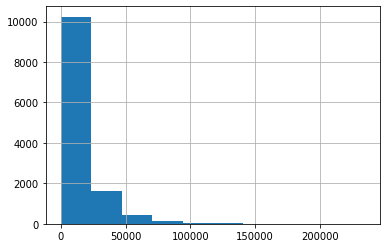

In [83]:
df.totals.hist();

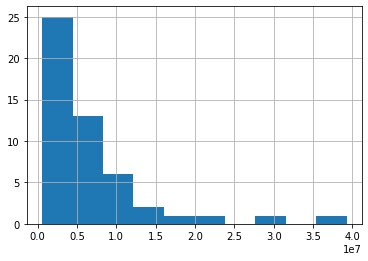

In [84]:
df2.population.hist();

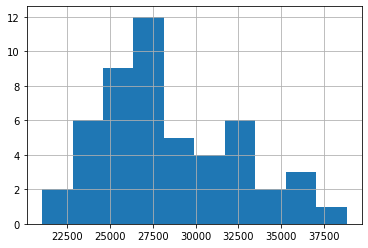

In [85]:
df2.income.hist();

>**As I can see from the charts the data for totals and population is right-skewed and the for of the data for income is more symmetrical.**

### Question 1: How the number of gun applications has changed over years?

>**I will create a line chart in order to see the trend in gun applications over time. Before doing that I will create a new dataframe from the census dataset.**

In [86]:
df.head()

,month,state,handgun,long_gun,other,multiple,totals
0,2017-09-01,Alabama,5743,6336,224,317,12620
1,2017-09-01,Alaska,2337,2954,220,160,5671
2,2017-09-01,Arizona,11101,7958,922,631,20612
3,2017-09-01,Arkansas,4360,6086,165,366,10977
4,2017-09-01,California,37165,24581,2984,0,64730


In [56]:
frame = {'month':df['month'],'total':df['totals']}
years = pd.DataFrame(frame)
years.insert(1,'year',df['month'].dt.year)

>**Since I'm focusing on years in this analysis I will exclude the data where a year is not complete (i.e. where not all 12 months are represented).**

In [57]:
years = years[(years.year > 1998) & (years.year < 2017)]

>**Now, I will group the data by year and change the data type of years column for the purpose of creating the chart. Since I'm interested to see the changes in number of applications I will be using sum as an aggregation.**

In [58]:
years_grp = years.groupby('year')['total'].sum()
frame2 = {'year':range(1999,2017),'app_number':years_grp}
time_chart = pd.DataFrame(frame2)
time_chart['year'] = pd.to_datetime(time_chart['year'], format = '%Y')

In [59]:
time_chart

,year,app_number
year,,
1999,1999-01-01,7857932
2000,2000-01-01,7067634
2001,2001-01-01,7207720
2002,2002-01-01,6347492
2003,2003-01-01,6333371
2004,2004-01-01,6599292
2005,2005-01-01,6935952
2006,2006-01-01,7361033
2007,2007-01-01,7530727


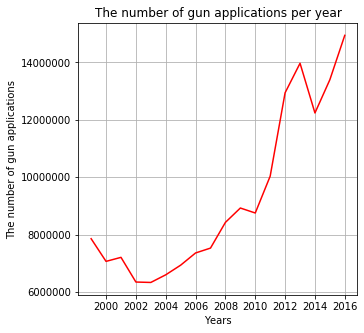

In [60]:
plt.subplots(figsize=(5, 5))
plt.plot_date(x=time_chart['year'],y=time_chart['app_number'], fmt="r-")
plt.title('The number of gun applications per year')
plt.ylabel('The number of gun applications')
plt.xlabel('Years')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0, 0))
plt.grid(True);

>**I chose the line chart since it's the best option to compare the changes of trends over time.**

>**Looking at the chart I can conclude that the number of gun application has grown over the years.**

### Question 2: Which state has the highest number of applictions?

>**Since the census data is up to 1st of July 2016 I need to exclude the gun dataset with month starting from 2016-Jul. I'll convert 'month' column to date first.**

In [61]:
dfq2 = df[df['month']<'2016-07']

>**I chose a sum for the aggregation because this data be averaged during the analysis, i.e. not to average the data twice.**

In [62]:
dfq2_grp = dfq2.groupby('state')['totals'].sum()

>**I'll prepare the dataframes for merging so that I can gather all the columns in one table.**

In [63]:
frame3 = {'state':df['state'].unique(),'app_num':dfq2_grp}
dfmerge = pd.DataFrame(frame3)
dfmerge.reset_index(drop = True, inplace = True)

In [64]:
df2.head()

Fact,state,population,income,Handgun_Permit_Required,Long_Gun_Permit_Required,Stand_or_Retreat
0,Alabama,4863300,24091,No,No,Stand
1,Alaska,741894,33413,No,No,Stand
2,Arizona,6931071,25848,No,No,Stand
3,Arkansas,2988248,22798,No,No,Retreat
4,California,39250017,30318,Yes,Yes,Stand


In [65]:
frame4 = {'state':df2['state'],'population':df2['population']}
df2merge = pd.DataFrame(frame4)

In [66]:
def merge_state(left,right):
#this function takes 2 table name as the arguments as merges the specified tables in inner join style.
    frame = pd.merge(left,right,how='inner',left_on = 'state',right_on = 'state')
    return frame

In [67]:
main_frame = merge_state(dfmerge,df2merge)
main_frame.head()

,state,app_num,population
0,Alabama,4741400,4863300
1,Alaska,957662,741894
2,Arizona,3054484,6931071
3,Arkansas,2509528,2988248
4,California,10939766,39250017


>**I'll use the number of applications divided by the number of population to caclulate the average number of applications per person since some states are less populated than other.**

In [68]:
main_frame['ratio'] = main_frame['app_num']/main_frame['population']
pd.options.display.float_format = '{:.6f}'.format#increasing the number of digits after the decimal point 
#to show the values.

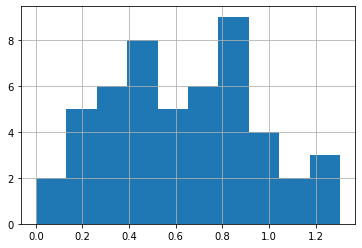

In [69]:
main_frame['ratio'].hist();

>**The distribution of ratio column values looks closer to normal now so it can be analyzed with .mean() function.** 

>**I'll add state codes so that it displays better.**

In [70]:
main_frame['state_code'] = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI','MT', 'MS', 'MO', 'MT', 'NE','NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

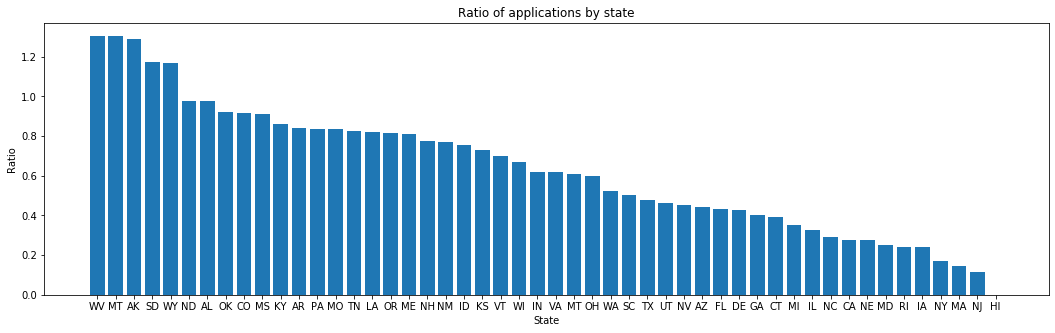

In [71]:
state_barchart = main_frame.sort_values('ratio',ascending = False)
plt.subplots(figsize=(18, 5))
plt.title('Ratio of applications by state')
plt.xlabel('State')
plt.ylabel('Ratio')
plt.xticks(range(50),state_barchart['state_code'])
plt.bar(range(50),state_barchart['ratio'],align = 'center',alpha = 1);

>**I chose bar chart to compare the number of applications by state since it's best to compare the rate across so many state.**

>**The chart shows that West Virginia, Montana, Alaska, South Dakota and Wyoming have the highest gun applications ratio while other states as New York, Massachusetts, New Jersey and Hawaii have the lowest rate.**

### Question 3: Do gun laws impact the number of applications?

In [72]:
main_frame.head()

,state,app_num,population,ratio,state_code
0,Alabama,4741400,4863300,0.974935,AL
1,Alaska,957662,741894,1.290834,AK
2,Arizona,3054484,6931071,0.440694,AZ
3,Arkansas,2509528,2988248,0.839799,AR
4,California,10939766,39250017,0.278720,CA


>**In order to answer this question I will add new columns containing the data regarding gun laws to the dataframe.**

In [73]:
main_frame.insert(1,'handgun_permit',df2['Handgun_Permit_Required'])
main_frame.insert(2,'long_gun_permit',df2['Long_Gun_Permit_Required'])
main_frame.insert(3,'stand_or_retreat',df2['Stand_or_Retreat'])

>**I will create a dataframe since it's more effective to create a bar chart from a separate dataframe.**

>**I chose mean here since the ratio distribution is close to normal.**

In [74]:
q3_grp = main_frame.groupby('stand_or_retreat')['ratio'].mean()
q3_grp

stand_or_retreat
Retreat   0.434997
Stand     0.717493
Name: ratio, dtype: float64

In [75]:
frame5 = {'stand_or_retreat':['Duty to Retreat','Stand Your Ground'],'ratio':q3_grp}
SoR_barchart = pd.DataFrame(frame5)

In [76]:
SoR_barchart.reset_index(drop = True, inplace = True)
SoR_barchart

,stand_or_retreat,ratio
0,Duty to Retreat,0.434997
1,Stand Your Ground,0.717493


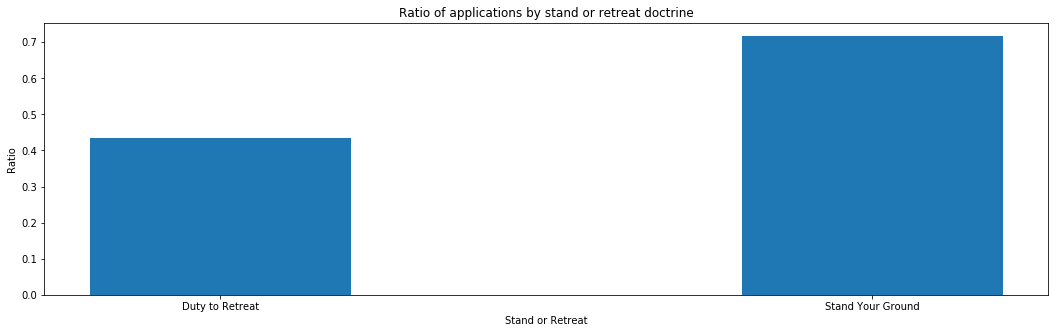

In [77]:
plt.subplots(figsize=(18, 5))
plt.title('Ratio of applications by stand or retreat doctrine')
plt.xlabel('Stand or Retreat')
plt.ylabel('Ratio')
plt.xticks([2,4],SoR_barchart['stand_or_retreat'])
plt.bar([2,4],SoR_barchart['ratio'],align = 'center',alpha = 1);

>**I chose the bar chart to show the distribution of doctrines data since the rates for yeach category can be easily compared.**

>**I can conclude from this bar chart that average ratio of gun applications is higher in the states where 'Stand Your Ground' doctrine is adopted.**

>**Again, I will create a separate dataframe for the charts then I will create a bar chart with a column for each of 4 possible gun law options.**

In [78]:
q3_grp2 = main_frame.groupby(['handgun_permit','long_gun_permit'])['ratio'].mean()
q3_grp2

handgun_permit  long_gun_permit
No              No                0.774514
                Yes               0.522211
Yes             No                0.358491
                Yes               0.213935
Name: ratio, dtype: float64

In [79]:
frame6 = {'gun_permit':['No Pemit','For Long Gun','For Hand Gun','Permit Required'],'ratio':q3_grp2}
gunlaw_barchart = pd.DataFrame(frame6)

In [80]:
gunlaw_barchart.reset_index(drop = True, inplace = True)

In [81]:
gunlaw_barchart

,gun_permit,ratio
0,No Pemit,0.774514
1,For Long Gun,0.522211
2,For Hand Gun,0.358491
3,Permit Required,0.213935


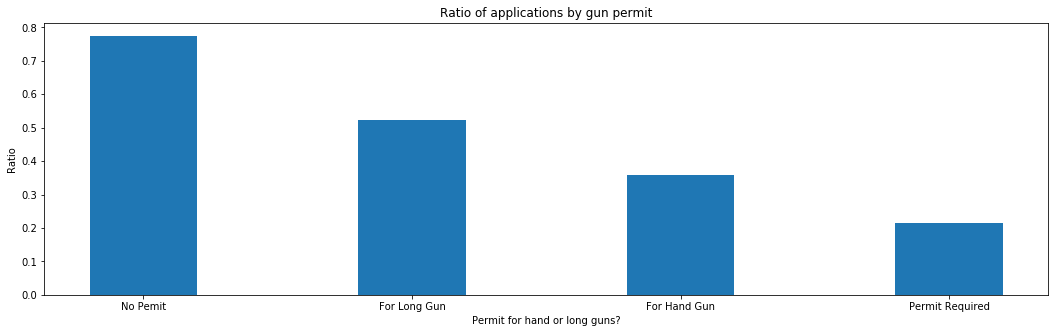

In [82]:
plt.subplots(figsize=(18, 5))
plt.title('Ratio of applications by gun permit')
plt.xlabel('Permit for hand or long guns?')
plt.ylabel('Ratio')
plt.xticks([2,4,6,8],gunlaw_barchart['gun_permit'])
plt.bar([2,4,6,8],gunlaw_barchart['ratio'],align = 'center',alpha = 1);

>**I chose the bar chart to show the distribution of gun permit data since the rates for yeach category can be easily compared.**

>**I can conclude from the bar chart the states without a permit for both types of guns has the highest rate of gun applications. The second one is the state without permit for hand guns. The lowest rate of gun applications is observed where the permit for buying both guns is required.**

>**I will look at the list of the states with no permit required and with the 'Stand Your Ground' doctrine adopted.** 

In [88]:
no_permit = []
for n,i in enumerate(df2['state']):
    if df2.loc[n,'Handgun_Permit_Required'] == 'No' and df2.loc[n,'Long_Gun_Permit_Required'] == 'No':
        no_permit.append(i)
print('list of states with no permit: ')
print(no_permit)
print('-'*50)
syg = []
for n,i in enumerate(df2['state']):
    if df2.loc[n,'Stand_or_Retreat'] == 'SYG':
        syg.append(i)
print('list of states with SYG: ')
print(no_permit)

list of states with no permit: 
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Delaware', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Hampshire', 'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'West Virginia', 'Wyoming']
--------------------------------------------------
list of states with SYG: 
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Delaware', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Hampshire', 'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'West Virginia', 'Wyoming']


>**It can be seen from the table above that the states with the highest rates of gun applications are in both lists of states with no gun permit and with 'Stand Your Ground' doctrine adopted.**

### Question 4: Does the level of income impacts the number of applications?

>**To answer this question I will adjust the data from the gun data so that it was it the same timeframe as the income column in the census data (2011-2015), calculate the ratio and create a new dataframe for more effective plotting.**

In [368]:
income_filter = df[(df.month < '2016-01') & (df.month > '2010-12')]

In [369]:
income_filter.reset_index(drop = True, inplace = True)

In [370]:
income_filter.head()

,month,state,handgun,long_gun,other,multiple,totals
0,2015-12-01,Alabama,47617,33724,1702,1752,84795
1,2015-12-01,Alaska,5266,4641,356,214,10477
2,2015-12-01,Arizona,25568,14727,1329,995,42619
3,2015-12-01,Arkansas,13789,15248,366,521,29924
4,2015-12-01,California,74399,48762,9583,0,132744


In [371]:
q4_grp = income_filter.groupby('state')['totals'].sum()

In [372]:
frame7 = {'state':income_filter['state'].unique(),'sum_app':q4_grp}
income_gun = pd.DataFrame(frame7)
income_gun.reset_index(drop = True, inplace = True)
income_gun.head(3)

,state,sum_app
0,Alabama,1879119
1,Alaska,389555
2,Arizona,1203340


In [373]:
frame8 = {'state':df2['state'],'population':df2['population'],'income':df2['income']}
income_census = pd.DataFrame(frame8)

In [374]:
q4_main = merge_state(income_gun,income_census)

In [375]:
q4_main.head()

,state,sum_app,population,income
0,Alabama,1879119,4863300,24091
1,Alaska,389555,741894,33413
2,Arizona,1203340,6931071,25848
3,Arkansas,798915,2988248,22798
4,California,4147316,39250017,30318


In [376]:
q4_main['ratio'] = q4_main['sum_app']/q4_main['population']
q4_main.head(4)

,state,sum_app,population,income,ratio
0,Alabama,1879119,4863300,24091,0.386388
1,Alaska,389555,741894,33413,0.525082
2,Arizona,1203340,6931071,25848,0.173615
3,Arkansas,798915,2988248,22798,0.267352


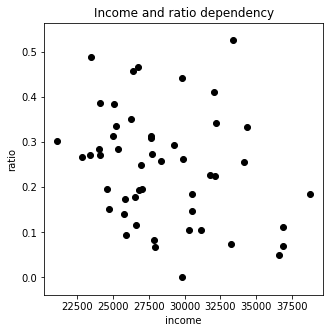

In [377]:
plt.subplots(figsize=(5, 5))
plt.title('Income and ratio dependency')
plt.xlabel('income')
plt.ylabel('ratio')
plt.scatter(q4_main['income'],q4_main['ratio'],c=(0,0,0),alpha = 1);

>**I chose the scatterplot for that data since this plot is the best to compare 2 quantitative variables.**

In [378]:
np.corrcoef(q4_main['income'],q4_main['ratio'])

array([[ 1.        , -0.27043798],
       [-0.27043798,  1.        ]])

>**As it can be seen from the chart even though the correlation coefficient shows a slight negative correlation the data is dispersed so I can tell for sure that the average in a particular state influences the number of gun applications.**

<a id='conclusions'></a>
## Conclusions

> **Limitations of the Data**

>**Summary**:

>The main conclusion from the data is that the number of gun applications is steadily growing even though there have been some declines.

>After investigating gun application data set I came to a conclusion that the most influental factor on gun purchases is the gun-related and self-defense laws. Based on the ratio of gun applications to populaiton it can be observed that the states without any permit required to purchase a gun and adopted 'Stand Your Ground' doctrine allowing to apply lethal force in order to defense one's self have the highest gun applications ratio.

>The other fact that drew my attention is thata there are more applictions in the states where a permit is required to buy long guns only then in the states where a permit is required for hand guns.

>I obtained no substantial evidence of the level of income impacting the number of gun applications even though there were a slight negative correlation it's not enough to conclude that income impact the number of gun applications.

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

> **Limitations of the Data**: 

>As it was said <a href="https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md">here</a> the number of firearm applications doesn't reflect the number of firearm purchases since a large proportion of firearms are bought withoug conducting a background check.

>The population and income obtained form the census data are estimations which means they may not reflect the actual population.

>In the census data there were no data for DC and US territories.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!



In [379]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0